In [ ]:
import numpy as np
import pandas as pd

import plotly.express as px
import geopandas as gpd
from shapely.geometry import Point
import folium

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_absolute_error
import random
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from sklearn.ensemble import RandomForestRegressor

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import torch.nn.functional as F
import torch.nn.init as init

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [ ]:
train = pd.read_csv('./drive/MyDrive/co2/train.csv', index_col='ID_LAT_LON_YEAR_WEEK')
test = pd.read_csv('./drive/MyDrive/co2/test.csv', index_col='ID_LAT_LON_YEAR_WEEK')
print(train.shape)

TRAIN = train.copy()
TEST = test.copy()

(79023, 75)


In [ ]:
train.head()

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_sensor_azimuth_angle,SulphurDioxide_sensor_zenith_angle,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,emission
ID_LAT_LON_YEAR_WEEK,,,,,,,,,,,,,,,,,,,,,
ID_-0.510_29.290_2019_00,-0.51,29.29,2019,0,-0.000108,0.603019,-0.000065,0.255668,-98.593887,50.843559,...,3664.436218,61085.809570,2615.120483,15.568533,0.272292,-12.628986,35.632416,-138.786423,30.752140,3.750994
ID_-0.510_29.290_2019_01,-0.51,29.29,2019,1,0.000021,0.728214,0.000014,0.130988,16.592861,39.137194,...,3651.190311,66969.478735,3174.572424,8.690601,0.256830,30.359375,39.557633,-145.183930,27.251779,4.025176
ID_-0.510_29.290_2019_02,-0.51,29.29,2019,2,0.000514,0.748199,0.000385,0.110018,72.795837,52.868816,...,4216.986492,60068.894448,3516.282669,21.103410,0.251101,15.377883,30.401823,-142.519545,26.193296,4.231381
ID_-0.510_29.290_2019_03,-0.51,29.29,2019,3,NaN,NaN,NaN,NaN,NaN,NaN,...,5228.507736,51064.547339,4180.973322,15.386899,0.262043,-11.293399,24.380357,-132.665828,28.829155,4.305286
ID_-0.510_29.290_2019_04,-0.51,29.29,2019,4,-0.000079,0.676296,-0.000048,0.121164,4.121269,35.515587,...,3980.598120,63751.125781,3355.710107,8.114694,0.235847,38.532263,37.392979,-141.509805,22.204612,4.347317


In [ ]:
train.columns

Index(['latitude', 'longitude', 'year', 'week_no',
       'SulphurDioxide_SO2_column_number_density',
       'SulphurDioxide_SO2_column_number_density_amf',
       'SulphurDioxide_SO2_slant_column_number_density',
       'SulphurDioxide_cloud_fraction', 'SulphurDioxide_sensor_azimuth_angle',
       'SulphurDioxide_sensor_zenith_angle',
       'SulphurDioxide_solar_azimuth_angle',
       'SulphurDioxide_solar_zenith_angle',
       'SulphurDioxide_SO2_column_number_density_15km',
       'CarbonMonoxide_CO_column_number_density',
       'CarbonMonoxide_H2O_column_number_density',
       'CarbonMonoxide_cloud_height', 'CarbonMonoxide_sensor_altitude',
       'CarbonMonoxide_sensor_azimuth_angle',
       'CarbonMonoxide_sensor_zenith_angle',
       'CarbonMonoxide_solar_azimuth_angle',
       'CarbonMonoxide_solar_zenith_angle',
       'NitrogenDioxide_NO2_column_number_density',
       'NitrogenDioxide_tropospheric_NO2_column_number_density',
       'NitrogenDioxide_stratospheric_NO2_colum

# Data Summary

In [ ]:
mean_emission_per_year_and_week = (
    train.groupby(["year", "week_no"]).emission.mean().reset_index()
)

fig = px.line(
    mean_emission_per_year_and_week,
    x="week_no",
    y="emission",
    labels={"Emission": "Mean Emission", "week_no": "Week Number"},
    color="year",
    color_discrete_sequence=["#6B6A6A", "#E04C5F", "#6B6A6A"],
    line_dash="year",
    line_dash_sequence=["dashdot", "solid", "dash"],
    title="Mean CO\u2082 Emission per Week & Year",
    height=480,
    width=840,
)
fig.update_traces(line_width=1.75, opacity=0.75)
fig.update_layout(
    font_color="black",
    title_font_size=18,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_range=(-1, 53),
    yaxis_range=(0, 140),
    legend=dict(yanchor="bottom", xanchor="right", y=1, x=1, orientation="h", title=""),
)
fig.show()

In [ ]:

def draw_pics(mean_data, features ):
  fig = px.line(
      mean_data,
      x="week_no",
      y=features,
      labels={"Emission": "Mean Emission", "week_no": "Week Number"},
      color="year",
      color_discrete_sequence=["#6B6A6A", "#E04C5F", "#6B6A6A"],
      line_dash="year",
      line_dash_sequence=["dashdot", "solid", "dash"],
      title="Mean "+ features + " per Week & Year",
      height=480,
      width=840,
  )
  fig.update_traces(line_width=1.75, opacity=0.75)
  fig.update_layout(
      font_color="black",
      title_font_size=18,
      xaxis_showgrid=False,
      yaxis_showgrid=False,
      xaxis_range=(-1, 53),
      yaxis_range=(np.min(mean_data[features]), np.max(mean_data[features])),
      legend=dict(yanchor="bottom", xanchor="right", y=1, x=1, orientation="h", title=""),
  )
  fig.show()

mean_SO2_per_year_and_week = (train.groupby(["year", "week_no"]).SulphurDioxide_SO2_column_number_density.mean().reset_index())

mean_NO2_per_year_and_week = (train.groupby(["year", "week_no"]).NitrogenDioxide_NO2_column_number_density.mean().reset_index())

mean_HCHO_per_year_and_week = (train.groupby(["year", "week_no"]).Formaldehyde_HCHO_slant_column_number_density.mean().reset_index())

mean_CO_per_year_and_week = (train.groupby(["year", "week_no"]).CarbonMonoxide_CO_column_number_density.mean().reset_index())

mean_UVA_per_year_and_week = (train.groupby(["year", "week_no"]).UvAerosolIndex_absorbing_aerosol_index.mean().reset_index())

mean_O3_per_year_and_week = (train.groupby(["year", "week_no"]).Ozone_O3_column_number_density.mean().reset_index())

mean_UVAH_per_year_and_week = (train.groupby(["year", "week_no"]).UvAerosolLayerHeight_aerosol_height.mean().reset_index())

mean_C_per_year_and_week = (train.groupby(["year", "week_no"]).Cloud_cloud_fraction.mean().reset_index())

draw_pics(mean_SO2_per_year_and_week, "SulphurDioxide_SO2_column_number_density")

draw_pics(mean_NO2_per_year_and_week, "NitrogenDioxide_NO2_column_number_density")

draw_pics(mean_CO_per_year_and_week, "CarbonMonoxide_CO_column_number_density")

draw_pics(mean_HCHO_per_year_and_week, "Formaldehyde_HCHO_slant_column_number_density")

draw_pics(mean_UVA_per_year_and_week, "UvAerosolIndex_absorbing_aerosol_index")

draw_pics(mean_O3_per_year_and_week, "Ozone_O3_column_number_density")

draw_pics(mean_UVAH_per_year_and_week, "UvAerosolLayerHeight_aerosol_height")

draw_pics(mean_C_per_year_and_week, "Cloud_cloud_fraction")


Time Series Domains

In [ ]:
mean_emission_per_year_and_week = (
    TRAIN.groupby(["year", "week_no"]).emission.mean().reset_index()
)

fig = px.line(
    mean_emission_per_year_and_week,
    x="week_no",
    y="emission",
    labels={"Emission": "Mean Emission", "week_no": "Week Number"},
    color="year",
    color_discrete_sequence=["#6B6A6A", "#E04C5F", "#6B6A6A"],
    line_dash="year",
    line_dash_sequence=["dashdot", "solid", "dash"],
    title="Mean CO\u2082 Emission per Week & Year",
    height=480,
    width=840,
)
fig.update_traces(line_width=1.75, opacity=0.75)
fig.update_layout(
    font_color="black",
    title_font_size=18,
    xaxis_showgrid=False,
    yaxis_showgrid=False,
    xaxis_range=(-1, 53),
    yaxis_range=(0, 140),
    legend=dict(yanchor="bottom", xanchor="right", y=1, x=1, orientation="h", title=""),
)
fig.show()

In [ ]:
top20_corrs = abs(train.corr()['emission']).sort_values(ascending = False).head(6)
top20_corrs

emission                                    1.000000
longitude                                   0.102746
UvAerosolLayerHeight_aerosol_height         0.069008
UvAerosolLayerHeight_aerosol_pressure       0.068138
Cloud_surface_albedo                        0.046587
CarbonMonoxide_H2O_column_number_density    0.043217
Name: emission, dtype: float64

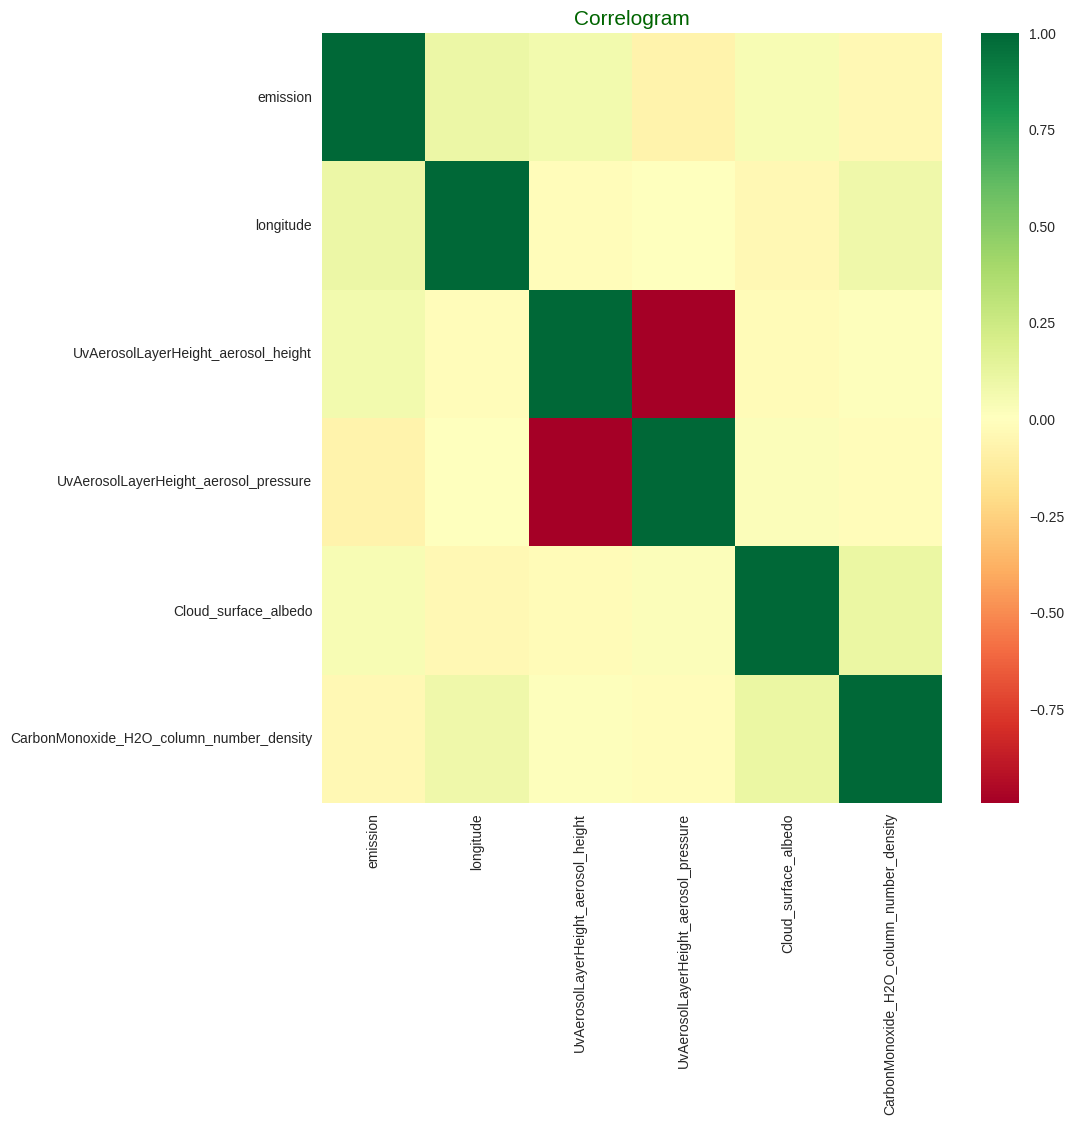

In [ ]:
corr = train[list(top20_corrs.index)].corr()
plt.figure(figsize = (10, 10))
sns.heatmap(corr, cmap='RdYlGn', center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

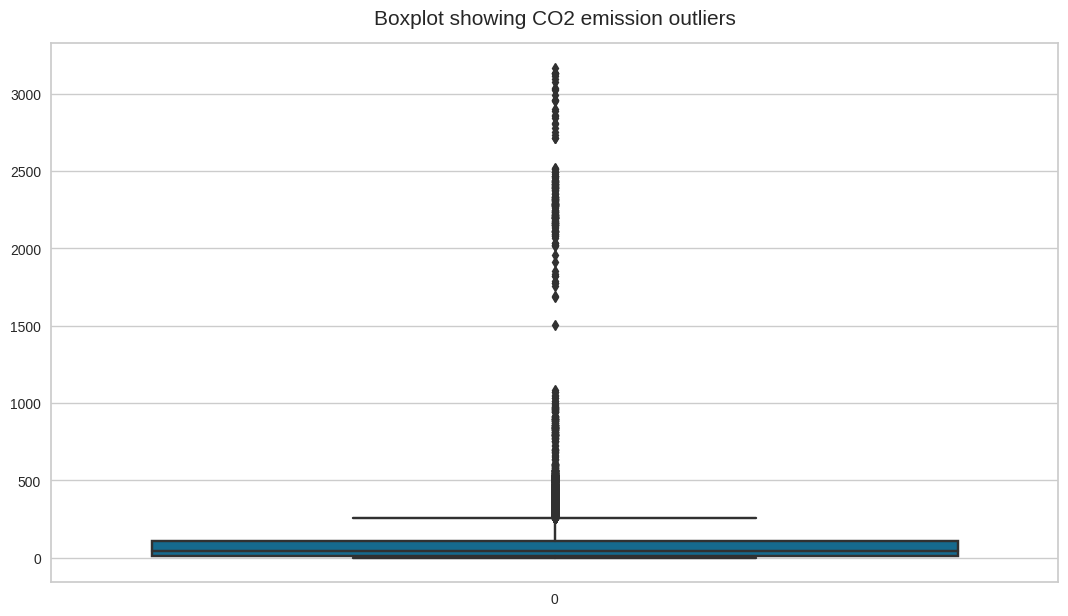

In [ ]:
plt.figure(figsize = (13, 7))
sns.boxplot(train.emission)
plt.title('Boxplot showing CO2 emission outliers', y = 1.02, fontsize = 15)
plt.show()

Frequency

## Date

The train data contains 3-year information from 2019 to 2021, each has 53 weeks of info.

The test data contain info of year 2022, each has 49 weeks of info.

In [ ]:
train_years = train.year.unique()
test_years = test.year.unique()

train_weeks = train.week_no.unique()
test_weeks = test.week_no.unique()

print("Years in train: ", train_years)
print("Years in test: ", test_years)
print("Weeks in train: ", len(train_weeks))
print("Weeks in test: ", len(test_weeks))

Years in train:  [2019 2020 2021]
Years in test:  [2022]
Weeks in train:  53
Weeks in test:  49


## Geographical locations

A geographical location is defined as the (latitude, longitude), a coordinate  pair. After we add the **Coordinates** feture and then group the data, both training and testing contain 497 unique locations.

In [ ]:
def get_coordinates(lat, lon):
    return "(" + lat.astype(str) + ", " + lon.astype(str) + ")"


train["coordinates"] = get_coordinates(train.latitude, train.longitude)
test["coordinates"] = get_coordinates(test.latitude, test.longitude)

train_locations = train["coordinates"].drop_duplicates().to_numpy()
test_locations = test["coordinates"].drop_duplicates().to_numpy()

print("Unique locations in train: ", len(train_locations))
print("Unique locations in test: ", len(test_locations))


Unique locations in train:  497
Unique locations in test:  497


## Location Map

Below is the CO2 Emission in Rwanda on Map

In [ ]:
geo_mean_emission = train.groupby(["latitude", "longitude"]).emission.mean().reset_index()
zero_emission = geo_mean_emission[geo_mean_emission.emission == 0]

fig = px.scatter_mapbox(
    geo_mean_emission,
    lat="latitude",
    lon="longitude",
    color="emission",
    size="emission",
    color_continuous_scale=px.colors.sequential.Jet,
    size_max=30,
    zoom=7,
    width=950,
    height=950,
    title="CO2 Emission in Rwanda"
)
fig.add_scattermapbox(
    lat=zero_emission.latitude,
    lon=zero_emission.longitude,
    name="Zero-Emission",
    marker=dict(color="#F51CBA", size=15, symbol="circle", opacity=0.75),
)
fig.update_layout(
    mapbox_style="open-street-map",
    margin=dict(r=0, t=90, l=0, b=0),
    title_font_size=18,
    coloraxis_colorbar=dict(
        title="Mean Emission",
        title_side="top",
        orientation="h",
        yanchor="bottom",
        xanchor="center",
        y=-0.13,
        x=0.5,
    ),
    legend=dict(yanchor="bottom", xanchor="right", y=1, x=1, orientation="h"),
)
fig.show()

## Zero Emission

There are 15 unique locations that have zero emission

In [ ]:
zero_emissions = train.groupby('coordinates')['emission'].mean().to_frame()
zero_emissions = zero_emissions[zero_emissions['emission'] == 0]
print("Number of locations with zero emission: ", len(zero_emissions))
zero_emissions

Number of locations with zero emission:  15


,emission
coordinates,
"(-1.328, 28.872)",0.0
"(-1.505, 30.995)",0.0
"(-1.532, 28.568)",0.0
"(-1.682, 29.218)",0.0
"(-1.696, 28.304)",0.0
"(-1.712, 28.688)",0.0
"(-1.73, 28.47)",0.0
"(-1.833, 28.467)",0.0
"(-1.839, 28.761)",0.0


## Missing Values

The statistics for missing values is presented as below.

We can see that among all 75 features, only 4 of them have all the values. They are Latitude, Longitude, Year and Week_no.

For all other features, we can divide other features into 7 groups: <u>SulphurDioxide, CarbonMonoxide, NitrogenDioxide, Formaldehyde, UVAerosolIndex, Ozone and Cloud</u>. Each of the group contains the same pattern of sub-features contain the density and angle information of the satellite. It's worth noticing that among these 7 groups, **UVAerosolIndex** is the worst on data completeness: over **99%** of training data and **91%** of testing data are missing.

The missing data will be processed in the ***Data Preprocessing*** Section.

In [ ]:
missing_values = pd.DataFrame(index=train.columns)
missing_values["TrainMissing"] = train.isna().sum()
missing_values["TrainMissingRatio"] = missing_values.TrainMissing / len(train)
missing_values["TestMissing"] = test.isna().sum()
missing_values["TestMissingRatio"] = missing_values.TestMissing / len(test)
missing_values.style.background_gradient(cmap='Blues').set_precision(3)

<ipython-input-16-3567af17aca1>:6: FutureWarning:

this method is deprecated in favour of `Styler.format(precision=..)`



,TrainMissing,TrainMissingRatio,TestMissing,TestMissingRatio
latitude,0,0.000,0.000,0.000
longitude,0,0.000,0.000,0.000
year,0,0.000,0.000,0.000
week_no,0,0.000,0.000,0.000
SulphurDioxide_SO2_column_number_density,14609,0.185,6142.000,0.252
SulphurDioxide_SO2_column_number_density_amf,14609,0.185,6142.000,0.252
SulphurDioxide_SO2_slant_column_number_density,14609,0.185,6142.000,0.252
SulphurDioxide_cloud_fraction,14609,0.185,6142.000,0.252
SulphurDioxide_sensor_azimuth_angle,14609,0.185,6142.000,0.252
SulphurDioxide_sensor_zenith_angle,14609,0.185,6142.000,0.252


## Target value distribution

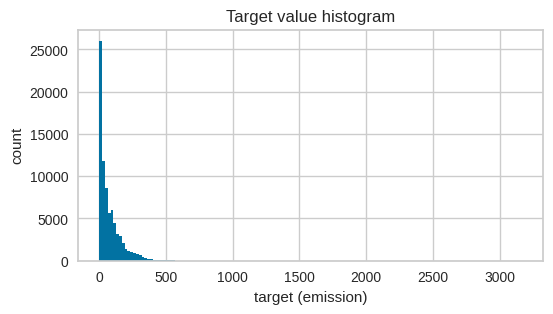

In [ ]:
plt.figure(figsize=(6, 3))
plt.hist(TRAIN.emission, bins=150)
plt.title('Target value histogram')
plt.xlabel('target (emission)')
plt.ylabel('count')
plt.savefig('target_dist2.png', dpi=1000)

plt.show()

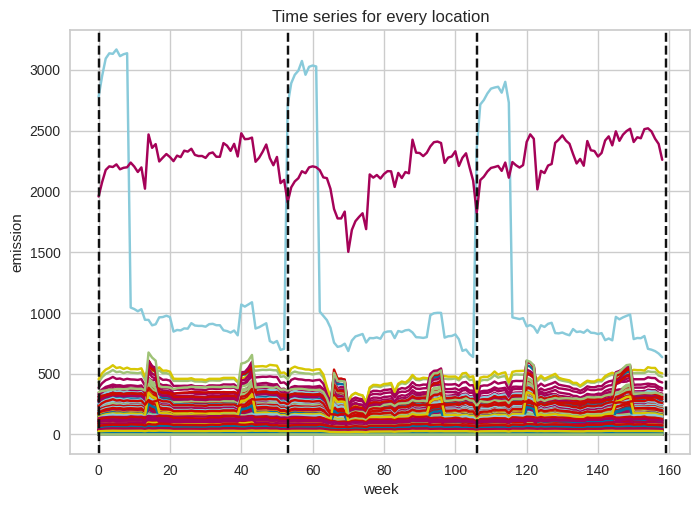

In [ ]:
for ll in TRAIN[['latitude', 'longitude']].drop_duplicates().iterrows():
    time_series = TRAIN[(TRAIN.latitude == ll[1].latitude) & (TRAIN.longitude == ll[1].longitude)].emission
    plt.plot(range(len(time_series)), time_series)
plt.title('Time series for every location')
for week in [0, 53, 106, 159]:
    plt.axvline(week, color='k', linestyle='--')
plt.xlabel('week')
plt.ylabel('emission')
plt.savefig('target_dist1.png', dpi=800)
plt.show()

# Data Preprocessing

## 1. Hanlde Missing Values



Since for **UVAerosolIndex** group, over 99% of training data and 91% of testing data are missing. As a result, we choose to eliminate the features in the **UVAerosolIndex** group.

In [ ]:
# Remove Uvaerosollayerheight cols

uv_cols = train.columns[train.columns.str.startswith("UvAerosolLayerHeight")]
train = train.drop(uv_cols, axis=1)
test = test.drop(uv_cols, axis=1)

## 2. Remove angle data

In [ ]:
angle_cols = train.columns[train.columns.str.endswith("angle")]
# print(angle_cols)

# print(train.shape)
# print(test.shape)

train = train.drop(angle_cols, axis=1)
test = test.drop(angle_cols, axis=1)

# print(train.shape)
# print(test.shape)

## 3. fill empty value with column mean

As for the features with partially missing values, we don't simply drop rows with missing data, but choose to use the column **mean** to recover.

In [ ]:
train = train.fillna(train.mean(numeric_only=True))
test = test.fillna(test.mean(numeric_only=True))
# test.info()

## 4. fix covid data

In [ ]:
# Calculate the average monthly sales for non-virus years (2019 and 2021)
avg_emission_non_virus = train[train['year'].isin((2019,2021))].groupby('week_no')['emission'].mean()

# Calculate the average monthly for virus year (2020)
avg_emission_virus = train[train['year'] == 2020].groupby('week_no')['emission'].mean()

# Calculate the ratios for each month
ratios_for_weeks = avg_emission_non_virus/avg_emission_virus

# Multiply the num_sold column for each row in 2020 by the corresponding ratio for the week of that row
train.loc[train['year'] == 2020, 'emission'] *= train['week_no'].map(ratios_for_weeks)


##5. Clustering the data using 'longitude','latitude', and 'emission'


In [ ]:
emission_series = train.pivot_table(index=['year','week_no'], columns=['longitude','latitude'], values='emission')
emission_series = np.array(emission_series).T
km_train = train.groupby(by=['longitude', 'latitude'], as_index=False)['emission'].mean()
km_train_new = np.hstack((np.array(km_train)[:,0:2], emission_series))
print(km_train_new)

[[ 28.228      -2.972       2.866021  ...   2.5536523   2.5392253
    2.4427655]
 [ 28.249      -2.451       3.822496  ...   2.6913924   2.700769
    2.642306 ]
 [ 28.297      -1.903       7.4594393 ...   7.0355897   6.752853
    6.6326585]
 ...
 [ 31.494      -0.806       6.9326615 ...   4.9880056   5.0104036
    4.8954673]
 [ 31.524      -1.176      12.106389  ...  14.649881   14.635458
   13.838275 ]
 [ 31.532      -1.068     254.38388   ... 300.9761    281.71732
  277.04     ]]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

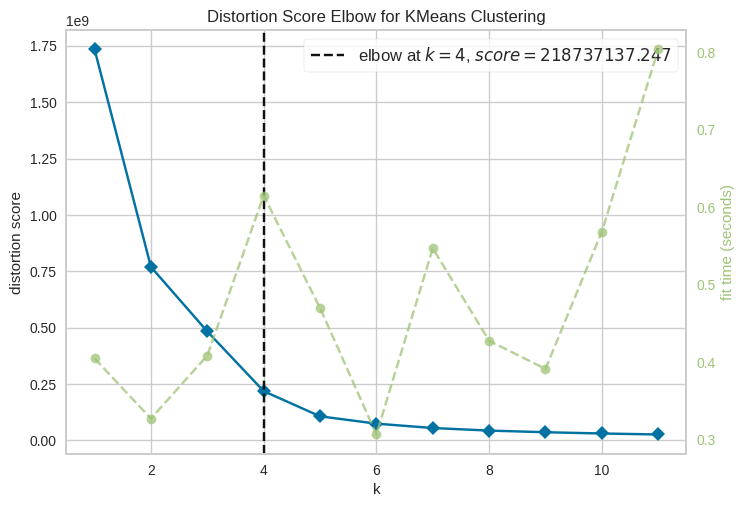

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(emission_series)
visualizer.show()

In [ ]:
gmm = GaussianMixture(n_components=3)
gmm.fit(km_train)
labels_train = gmm.predict(km_train)
print(labels_train.shape)
km_train['gmm_group'] = labels_train
for i in range(3):
  print(np.where(labels_train==i)[0].shape[0])

(497,)
218
278
1


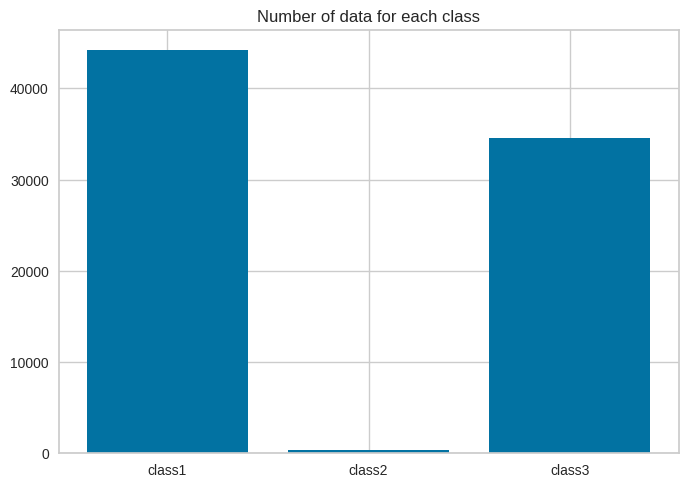

In [ ]:
bars = ['class1', 'class2', 'class3']
heights = [278*159, 2*159, 217*159]
plt.bar(bars, heights)

plt.title('Number of data for each class')

plt.show()


In [ ]:
for i in heights:
  print(i)

44202
318
34503


In [ ]:
train_cluster = train.merge(km_train[['latitude', 'longitude', 'gmm_group']], on=['latitude', 'longitude'])
test_cluster = test.merge(km_train[['latitude', 'longitude', 'gmm_group']], on=['latitude', 'longitude'])

In [ ]:
train_cluster

,latitude,longitude,year,week_no,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,SulphurDioxide_SO2_column_number_density_15km,CarbonMonoxide_CO_column_number_density,...,Cloud_cloud_fraction,Cloud_cloud_top_pressure,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,emission,coordinates,gmm_group
0,-0.510,29.290,2019,0,-0.000108,0.603019,-0.000065,0.255668,-0.000027,0.035370,...,0.595473,53534.732422,3664.436218,61085.809570,2615.120483,15.568533,0.272292,3.750994,"(-0.51, 29.29)",1
1,-0.510,29.290,2019,1,0.000021,0.728214,0.000014,0.130988,0.000012,0.036526,...,0.213608,63790.296241,3651.190311,66969.478735,3174.572424,8.690601,0.256830,4.025176,"(-0.51, 29.29)",1
2,-0.510,29.290,2019,2,0.000514,0.748199,0.000385,0.110018,0.000154,0.035338,...,0.703540,55923.790554,4216.986492,60068.894448,3516.282669,21.103410,0.251101,4.231381,"(-0.51, 29.29)",1
3,-0.510,29.290,2019,3,0.000048,0.834848,0.000035,0.158418,0.000015,0.036790,...,0.782806,44569.130636,5228.507736,51064.547339,4180.973322,15.386899,0.262043,4.305286,"(-0.51, 29.29)",1
4,-0.510,29.290,2019,4,-0.000079,0.676296,-0.000048,0.121164,-0.000028,0.034675,...,0.189336,59904.314844,3980.598120,63751.125781,3355.710107,8.114694,0.235847,4.347317,"(-0.51, 29.29)",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79018,-3.299,30.301,2021,48,0.000284,1.195643,0.000340,0.191313,0.000131,0.026488,...,0.766260,54703.511452,5459.185355,60657.101913,4590.879504,20.245954,0.304797,29.404171,"(-3.299, 30.301)",1
79019,-3.299,30.301,2021,49,0.000083,1.130868,0.000063,0.177222,0.000030,0.026049,...,0.480054,53983.493958,5606.449457,60168.191528,4659.130378,6.104610,0.314015,29.186497,"(-3.299, 30.301)",1
79020,-3.299,30.301,2021,50,0.000048,0.834848,0.000035,0.158418,0.000015,0.030098,...,0.862779,49904.738442,6222.646776,56596.027209,5222.646823,14.817885,0.288058,29.131205,"(-3.299, 30.301)",1
79021,-3.299,30.301,2021,51,-0.000034,0.879397,-0.000028,0.184209,-0.000015,0.031012,...,0.792255,41395.313100,7896.456885,46533.348194,6946.858022,32.594768,0.274047,28.125792,"(-3.299, 30.301)",1


*italicized text*## Spilt data for clustered data
Split 20% of the training set as validation set by randonly choosing 20% in each cluster.

In [ ]:
GT = train_cluster['emission'].to_numpy()
labels = train_cluster['gmm_group'].to_numpy()
train_cluster_drop = train_cluster.drop(columns=['latitude', 'longitude', 'year', 'week_no', 'emission', 'coordinates', 'gmm_group'])

train_set_cls = []
val_set_cls = []
GT_train_cls = []
GT_val_cls = []

train_np = np.array(train_cluster_drop)
train_np = train_np.astype(float)

for i in range(3):
  index_i = np.where(labels==i)[0]
  index_random = random.sample(range(len(index_i)), int(len(index_i)*0.2))
  index_i_val = index_i[index_random]
  index_i_train = np.delete(index_i, index_random)

  val_set_i = train_np[index_i_val]
  train_set_i =  train_np[index_i_train]
  train_set_cls.append(train_set_i)
  val_set_cls.append(val_set_i)

  GT_val_i = GT[index_i_val]
  GT_train_i = GT[index_i_train]
  GT_train_cls.append(GT_train_i)
  GT_val_cls.append(GT_val_i)

## Spilt data for all data
Split 20% of the training set as validation set by randonly choosing 20% of each data.

In [ ]:
index_random = random.sample(range(len(labels)), int(len(labels)*0.2))
val_set = train_np[index_random]
train_set = np.delete(train_np, index_random, axis=0)
print(val_set.shape)
print(train_set.shape)
GT_val = GT[index_random]
GT_train = np.delete(GT, index_random)
print(GT_val.shape)
print(GT_train.shape)

(15804, 35)
(63219, 35)
(15804,)
(63219,)


##Random Forest for all data
mean_train_error = 27.762 mean_val_error = 73.780

In [ ]:
model_RF = RandomForestRegressor()
model_RF.fit(train_set, GT_train)

print(f"The accuracy_score of training is ==> {model_RF.score(train_set, GT_train)}")
print(f"The accuracy_score of testing is ==> {model_RF.score(val_set, GT_val)}")

predict_train = model_RF.predict(train_set)
print(mean_absolute_error(predict_train, GT_train))

predict_val = model_RF.predict(val_set)
print(mean_absolute_error(predict_val, GT_val))

The accuracy_score of training is ==> 0.85998938218639
The accuracy_score of testing is ==> 0.0022451675296034646
28.092116060625816
72.56587817439288


##LightBGM for all data
mean_train_error = 42.560 mean_val_error = 71.700

In [ ]:
lgb_params = {

    'n_estimators': 835,
    'max_depth': 16,
    'reg_alpha': 3.849279869880706,
    'reg_lambda': 0.6840221712299135,
    'min_child_samples': 10,
    'subsample': 0.6810493885301987,
    'learning_rate': 0.0916362259866008,
    'colsample_bytree': 0.3133780298325982,
    'colsample_bynode': 0.7966712089198238,
    "random_state": 42,
    "num_leaves": 64
}

model_LGB = LGBMRegressor(**lgb_params)
model_LGB.fit(train_set, GT_train)

print(f"The accuracy_score of training is ==> {model_LGB.score(train_set, GT_train)}")
print(f"The accuracy_score of testing is ==> {model_LGB.score(val_set, GT_val)}")

predict_train = model_LGB.predict(train_set)
print(mean_absolute_error(predict_train, GT_train))

predict_val = model_LGB.predict(val_set)
print(mean_absolute_error(predict_val, GT_val))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020514 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 63219, number of used features: 35
[LightGBM] [Info] Start training from score 85.669534
The accuracy_score of training is ==> 0.7820449667179639
The accuracy_score of testing is ==> 0.01657511867738526
43.10663042699613
70.31655732708106


## Rondom Forest for clustered data
mean_train_error = 14.569 mean_val_error = 38.300

class1: 5.970364842161493 15.941640732754703

class2: 41.918889704519 146.14431904316987

class3: 27.087510414657547 70.66674049994117

In [ ]:
predictions_train = np.array([])
predictions_val = np.array([])
for i in range(3):
    train_set_i = train_set_cls[i]
    GT_train_i = GT_train_cls[i]
    val_set_i = val_set_cls[i]
    GT_val_i = GT_val_cls[i]

    model_i = RandomForestRegressor()
    model_i.fit(train_set_i, GT_train_i)
    predict_train = model_i.predict(train_set_i)
    predict_val = model_i.predict(val_set_i)
    predictions_train = np.append(predictions_train, predict_train)
    predictions_val = np.append(predictions_val, predict_val)

    print(mean_absolute_error(predict_train, GT_train_i))
    print(mean_absolute_error(predict_val, GT_val_i))

GT_train_ = np.array([])
GT_val_ = np.array([])
for i in range(3):
    GT_train_ = np.append(GT_train_, GT_train_cls[i])
    GT_val_ = np.append(GT_val_, GT_val_cls[i])

print(mean_absolute_error(predictions_train, GT_train_))
print(mean_absolute_error(predictions_val, GT_val_))

26.56091519181789
72.95465247493397
5.98207849596734
15.824148411726288
44.96804913169218
105.4776000844208
15.087446193172475
41.06036376121747


##XGB for all data
mean_train_error = 42.695 mean_val_error = 71.790

In [ ]:
xgb_params = {

    "random_state": 42,
}

model_XGB = XGBRegressor(**xgb_params)
model_XGB.fit(train_set, GT_train)

print(f"The accuracy_score of training is ==> {model_XGB.score(train_set, GT_train)}")
print(f"The accuracy_score of testing is ==> {model_XGB.score(val_set, GT_val)}")

predict_train = model_XGB.predict(train_set)
print(mean_absolute_error(predict_train, GT_train))

predict_val = model_XGB.predict(val_set)
print(mean_absolute_error(predict_val, GT_val))

The accuracy_score of training is ==> 0.5442538498671554
The accuracy_score of testing is ==> -0.04932317913050133
59.702113084312614
71.48300500630586


##LightGBM for clustered data
mean_train_error = 33.572 mean_val_error = 37.619

class1: 14.499356554388523 15.641130468978819

class2: 35.141244958659954 141.41251718617053

class3: 63.147787452349135 69.8819583636106

In [ ]:
predictions_train = np.array([])
predictions_val = np.array([])
for i in range(3):
    train_set_i = train_set_cls[i]
    GT_train_i = GT_train_cls[i]
    val_set_i = val_set_cls[i]
    GT_val_i = GT_val_cls[i]

    model_i = LGBMRegressor()
    model_i.fit(train_set_i, GT_train_i)
    predict_train = model_i.predict(train_set_i)
    predict_val = model_i.predict(val_set_i)
    predictions_train = np.append(predictions_train, predict_train)
    predictions_val = np.append(predictions_val, predict_val)

    print(f"The accuracy_score of training is ==> {model_i.score(train_set, GT_train)}")
    print(f"The accuracy_score of testing is ==> {model_i.score(val_set, GT_val)}")

    print(mean_absolute_error(predict_train, GT_train_i))
    print(mean_absolute_error(predict_val, GT_val_i))

GT_train_ = np.array([])
GT_val_ = np.array([])
for i in range(3):
    GT_train_ = np.append(GT_train_, GT_train_cls[i])
    GT_val_ = np.append(GT_val_, GT_val_cls[i])

print(mean_absolute_error(predictions_train, GT_train_))
print(mean_absolute_error(predictions_val, GT_val_))

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010465 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 27730, number of used features: 35
[LightGBM] [Info] Start training from score 157.169281
The accuracy_score of training is ==> -0.18964436507334037
The accuracy_score of testing is ==> -0.27345573210309615
62.419911735321286
71.96759994554743
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.013108 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 8925
[LightGBM] [Info] Number of data points in the train set: 35362, number of used features: 35
[LightGBM] [Info] Start training from score 20.094483
The accuracy_score of training is ==> -0.17536709505111636
The accuracy_score of testing is ==> -0.18242053638280087
14.482345047022754
15.632591801928356
[Lig

## XGB for clustered data
mean_train_error = 26.358 mean_val_error = 38.438

class1: 11.518835832891975 15.631794813349446

class2: 0.00039657157253181197 134.65667200403743

class3: 50.54170516017671 71.95963908189887

In [ ]:
predictions_train = np.array([])
predictions_val = np.array([])
for i in range(3):
    train_set_i = train_set_cls[i]
    GT_train_i = GT_train_cls[i]
    val_set_i = val_set_cls[i]
    GT_val_i = GT_val_cls[i]

    model_i = XGBRegressor(**xgb_params)
    model_i.fit(train_set_i, GT_train_i)
    predict_train = model_i.predict(train_set_i)
    predict_val = model_i.predict(val_set_i)
    predictions_train = np.append(predictions_train, predict_train)
    predictions_val = np.append(predictions_val, predict_val)

    print(f"The accuracy_score of training is ==> {model_i.score(train_set, GT_train)}")
    print(f"The accuracy_score of testing is ==> {model_i.score(val_set, GT_val)}")

    print(mean_absolute_error(predict_train, GT_train_i))
    print(mean_absolute_error(predict_val, GT_val_i))

GT_train_ = np.array([])
GT_val_ = np.array([])
for i in range(3):
    GT_train_ = np.append(GT_train_, GT_train_cls[i])
    GT_val_ = np.append(GT_val_, GT_val_cls[i])

print(mean_absolute_error(predictions_train, GT_train_))
print(mean_absolute_error(predictions_val, GT_val_))

The accuracy_score of training is ==> -0.1865281187576988
The accuracy_score of testing is ==> -0.2750875513654454
48.843737880792354
73.41380307373282
The accuracy_score of training is ==> -0.16943206215403794
The accuracy_score of testing is ==> -0.1748252113517621
11.593270917434308
15.501802841272374
The accuracy_score of training is ==> -217.49311270019592
The accuracy_score of testing is ==> -255.94397958165206
0.00043290143587171315
107.95536773139995
27.908860376907114
41.086315030287736


## 3. Add Latitude and longtitude to the PCA-transformed data and try to do the clustering on the new data. For each cluster, train a multi-linear-layers nueral network. For the data in the validation set, predict the cluster ID first, and then use the NN model of the corresponding cluster to do the prediction of the CO2 emission. The motivation of doing this is that the emission is correlated to the location in the map above.

Ensemble the dataset

In [ ]:
# location = train[['latitude', 'longitude']].to_numpy()
# print(location.shape)
# location_val = location[indexs]
# location_train = np.delete(location, indexs, axis=0)
# print(location_val.shape)
# print(location_train.shape)
# train_set_ens = np.concatenate((location_train, train_set_pca), axis = 1)
# val_set_ens = np.concatenate((location_val, val_set_pca), axis = 1)

Choose the number of k for clustering

clustering the data using the GaussianMixture model, and divide the training set into 3 cluster according to the clustering result

In [ ]:
predictions_train = np.array([])
predictions_val = np.array([])
for i in range(3):
    train_set_i = train_set_cls[i]
    GT_train_i = GT_train_cls[i]
    val_set_i = val_set_cls[i]
    GT_val_i = GT_val_cls[i]

    model_i = RandomForestRegressor()
    model_i.fit(train_set_i, GT_train_i)
    predict_train = model_i.predict(train_set_i)
    predict_val = model_i.predict(val_set_i)
    predictions_train = np.append(predictions_train, predict_train)
    predictions_val = np.append(predictions_val, predict_val)

    print(mean_absolute_error(predict_train, GT_train_i))
    print(mean_absolute_error(predict_val, GT_val_i))

GT_train_ = np.array([])
GT_val_ = np.array([])
for i in range(3):
    GT_train_ = np.append(GT_train_, GT_train_cls[i])
    GT_val_ = np.append(GT_val_, GT_val_cls[i])

print(mean_absolute_error(predictions_train, GT_train_))
print(mean_absolute_error(predictions_val, GT_val_))

26.399201953764447
73.17072620880732
5.983611268520573
15.86323936799693
45.03182060921317
110.09124234916278
15.01750086828997
41.18606205184897


In [ ]:
class MultiLayerLinearNN(nn.Module):
    def __init__(self, input_size, output_size):
        super(MultiLayerLinearNN, self).__init__()
        self.layer1 = nn.Linear(input_size, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 16)
        self.layer4 = nn.Linear(16, 1)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = self.layer4(x)
        return x
def initialize_weights(m):
    if isinstance(m, nn.Linear):
        init.xavier_uniform_(m.weight)
        m.bias.data.fill_(0)

# Hyperparameters
input_size = 35
output_size = 1
learning_rate = 0.001
batch_size = 32
device = torch.device('cuda' if torch.cuda.is_available else 'cpu')

# Initialize the neural network
model = MultiLayerLinearNN(input_size, output_size)
# model.apply(initialize_weights)
model.to(device)

# Define the loss and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
# move the training set and validation set to cuda
train_set = torch.tensor(train_set, dtype=torch.float)
GT_train = torch.tensor(GT_train, dtype=torch.float)
val_set = torch.tensor(val_set, dtype=torch.float)
GT_val = torch.tensor(GT_val, dtype=torch.float)

train = TensorDataset(train_set, GT_train)
val = TensorDataset(val_set, GT_val)
train_dl = DataLoader(train, batch_size)
val_dl = DataLoader(val, batch_size)

# Training loop
num_epochs = 20
loss_train_total = []
loss_val_total = []
for epoch in range(num_epochs):
  # Forward pass
  loss_train = []
  for x,y in train_dl:
    x = x.to(device)
    y = y.to(device)
    outputs = model(x)
    loss = criterion(outputs.reshape(-1), y)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_train.append(loss.detach().cpu())
  # print(torch.sqrt(sum(loss_train)/len(loss_train)))
  loss_train_total.append(torch.sqrt(sum(loss_train)/len(loss_train)))

  loss_val = []
  with torch.no_grad():
    for x,y in val_dl:
      x = x.to(device)
      y = y.to(device)
      outputs = model(x)
      loss = criterion(outputs.reshape(-1), y)
      loss_val.append(loss.detach().cpu())
  # print(torch.sqrt(sum(loss_val)/len(loss_val)))
  loss_val_total.append(torch.sqrt(sum(loss_val)/len(loss_val)))
print(loss_train_total)
print(loss_val_total)
fig, axs = plt.subplots(2, 1, figsize=(6, 8))
x = range(1, num_epochs+1)
axs[0].plot(x, loss_train_total)
axs[0].set_title('Training Loss')
axs[0].set_title('Training Loss')
axs[1].plot(x, loss_val_total)
axs[1].set_title('Validation Loss')
plt.tight_layout()
plt.show()

RuntimeError: ignored

In [ ]:
GT_train